In [2]:
import ast
import os
import itertools
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from preprocessing import * 
from trend_rating_analysis import *

In [3]:
# Read data
games = pd.read_csv("Data/games_detailed_info.csv", index_col=0) # review stats
# 1. Remove columns with > 20% of NA values 
key_columns = keep_columns_with_few_na(games)
# 2. Remove redundant/unnecesary columns
unnecessary_columns = ["type", "thumbnail", "image", "suggested_num_players", "suggested_playerage", 
                       "suggested_language_dependence"]
key_columns = [x for x in key_columns if x not in unnecessary_columns]
# 3. Rename confusing column names
games = games.loc[:,key_columns]
games.rename(columns={"primary": "name", "usersrated": "numratings", "average": "avgrating",
                      "boardgamecategory": "category", "boardgamemechanic": "mechanic", 
                      "boardgamedesigner": "designer", "boardgamepublisher": "publisher", 
                      "bayesaverage": "bayesavgrating", "Board Game Rank": "rank", 
                      "stddev": "stdrating", "median": "medianrating",
                      "owned": "numowned", "trading": "numtrades", "wanting":"numwants", 
                      "wishing": "numwishes"}, inplace=True)
# 4. Parse columns with list values
list_colnames = ["category", "mechanic", "designer", "publisher"]
games = parse_list_columns(games, list_colnames)

# 5. Create new dataframes with binary columns of 20 popular items
games_category, category_cnt = create_df_with_binary_columns(games, "category", 50)
games_mechanic, mechanic_cnt = create_df_with_binary_columns(games, "mechanic", 50)
games_designer, designer_cnt = create_df_with_binary_columns(games, "designer", 50)
games_publisher, publisher_cnt = create_df_with_binary_columns(games, "publisher", 50)

## Trend anlaysis

### 1. Overall #games published over years

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


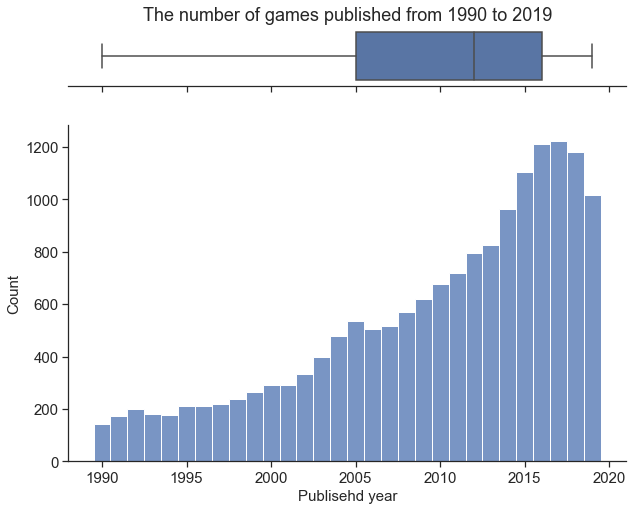

In [4]:
count_plot_over_year(games, 1990, 2019)

### 2. Average values of game attributes over years

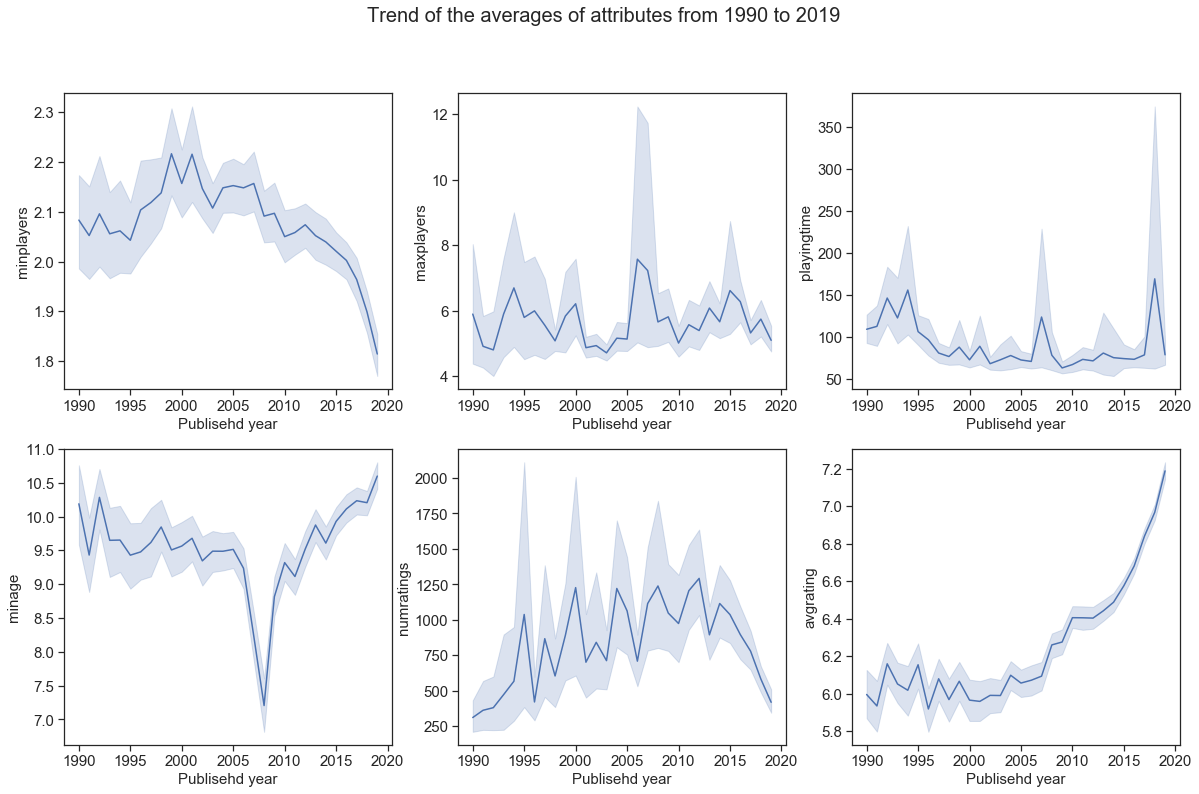

In [5]:
# TODO: set the thershold on the number of ratings?
lb = 1990; ub = 2019
df = games.loc[(games["yearpublished"] >= lb) & (games["yearpublished"] <= ub)]
fig = plt.figure(figsize=(20,12))
attribute_list = ["minplayers", "maxplayers", "playingtime", "minage", "numratings", "avgrating"]
for i, attribute in enumerate(attribute_list):
    plt.subplot(2,3,i+1)
    p = sns.lineplot(data=df, x="yearpublished", y=attribute)
    p.set_xlabel("Publisehd year", fontsize=15)
    p.set_ylabel(attribute, fontsize=15)
    p.tick_params(labelsize=15)
fig.suptitle("Trend of the averages of attributes from {} to {}".format(lb, ub), fontsize=20)
plt.show()

2007/2008 seems like an outlier (eperimental period?)

In [6]:
### TODO: Trend in the rate of published games per attribute?

### 3. Trend in the rate of published games per attribute

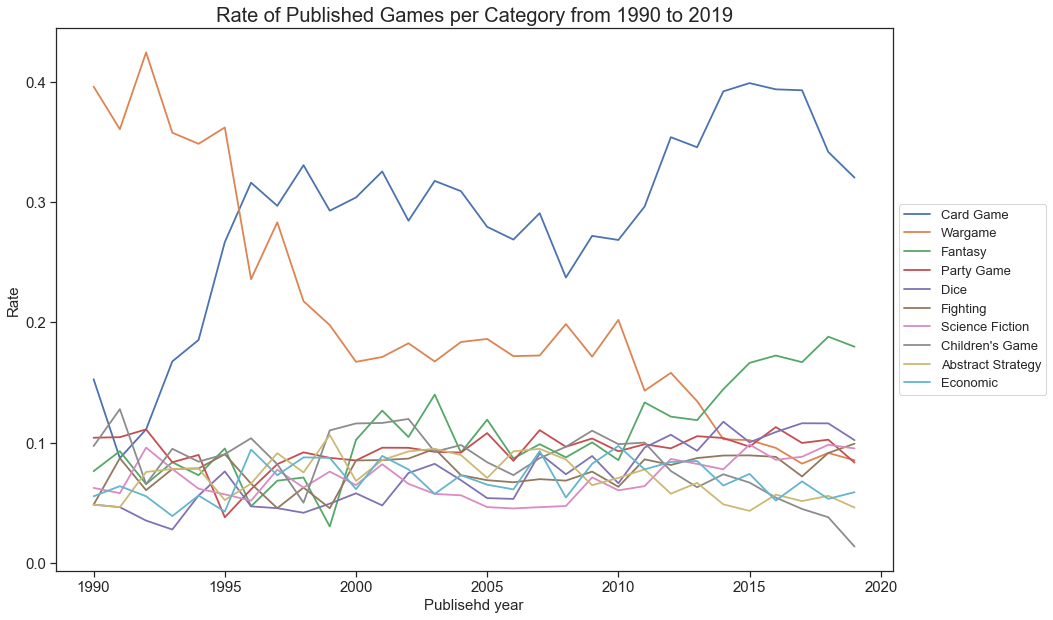

In [9]:
categories = [x[0] for x in category_cnt[:10]]
grouped_count_plot_over_year(games_category, 1990, 2019, categories, "Category")

Visible decline in war games while incrasing trend in card game/fantasy

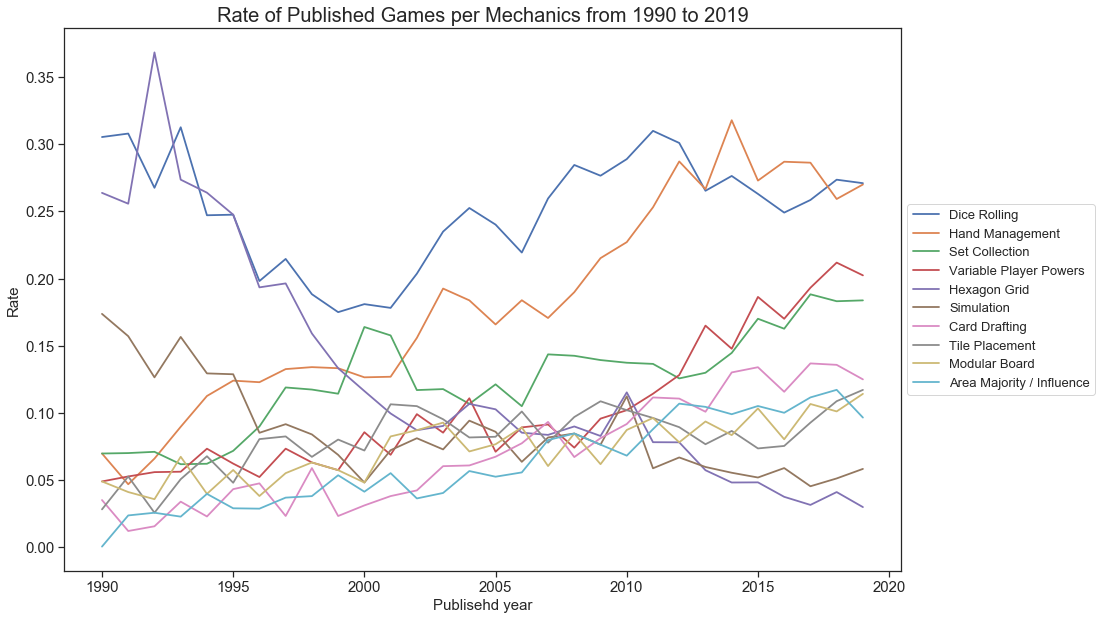

In [10]:
mechanics = [x[0] for x in mechanic_cnt[:10]]
grouped_count_plot_over_year(games_mechanic, 1990, 2019, mechanics, "Mechanics")

Declining trend in Hexaagon grid, increasing trend in hand management/variable player powers/set collections 

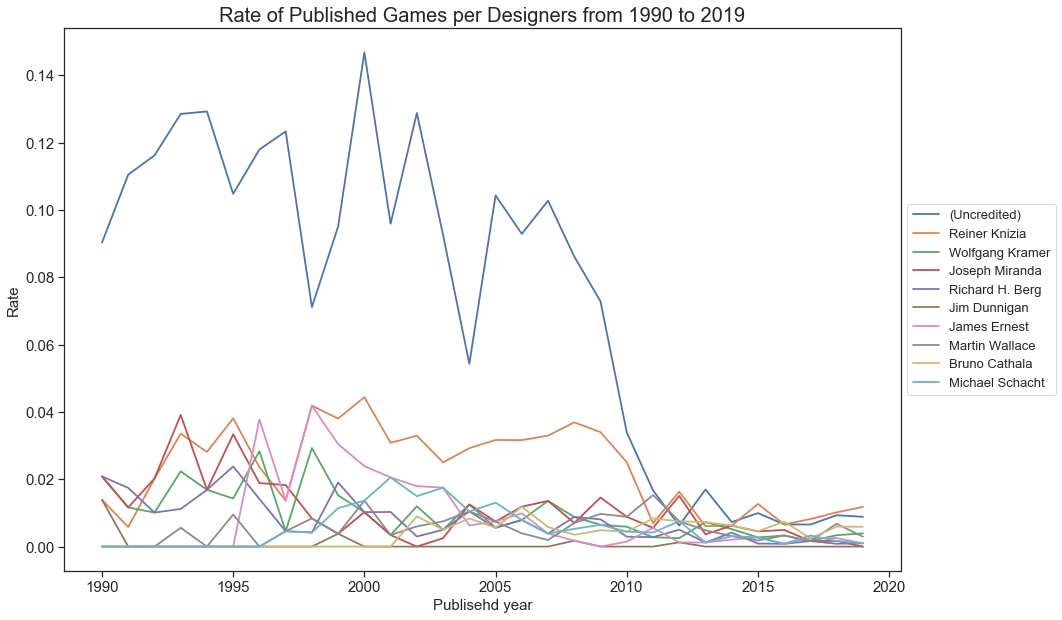

In [11]:
designers = [x[0] for x in designer_cnt[:10]]
grouped_count_plot_over_year(games_designer, 1990, 2019, designers, "Designers")

A lot of games were uncredited until 2010's. 

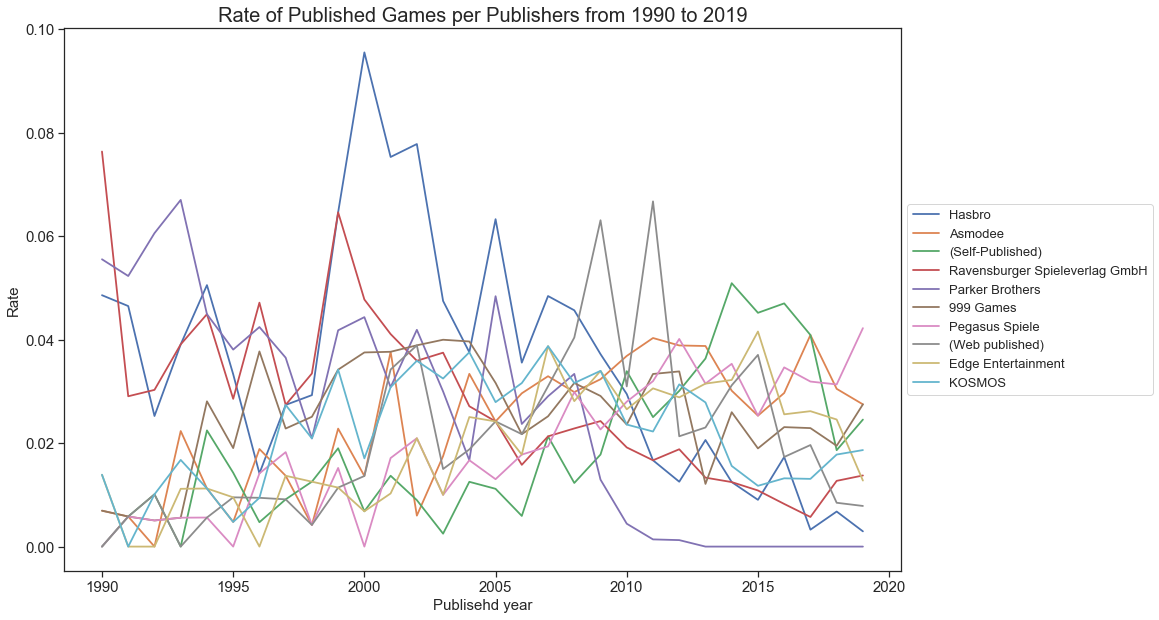

In [12]:
publishers = [x[0] for x in publisher_cnt[:10]]
grouped_count_plot_over_year(games_publisher, 1990, 2019, publishers, "Publishers")

No clear-cut dominace of a publisher; Hasbro's share peaked in early 2020's and then declined afterwards.

## Ratings per attribute

### Note: Filtered out games with num ratings < 100

In [13]:
popularity_metrics = ["avgrating", "numratings", 'numowned', 'numtrades', 'numwants', 'numwishes', 'numcomments']

### 1. Average popularity metrics per category

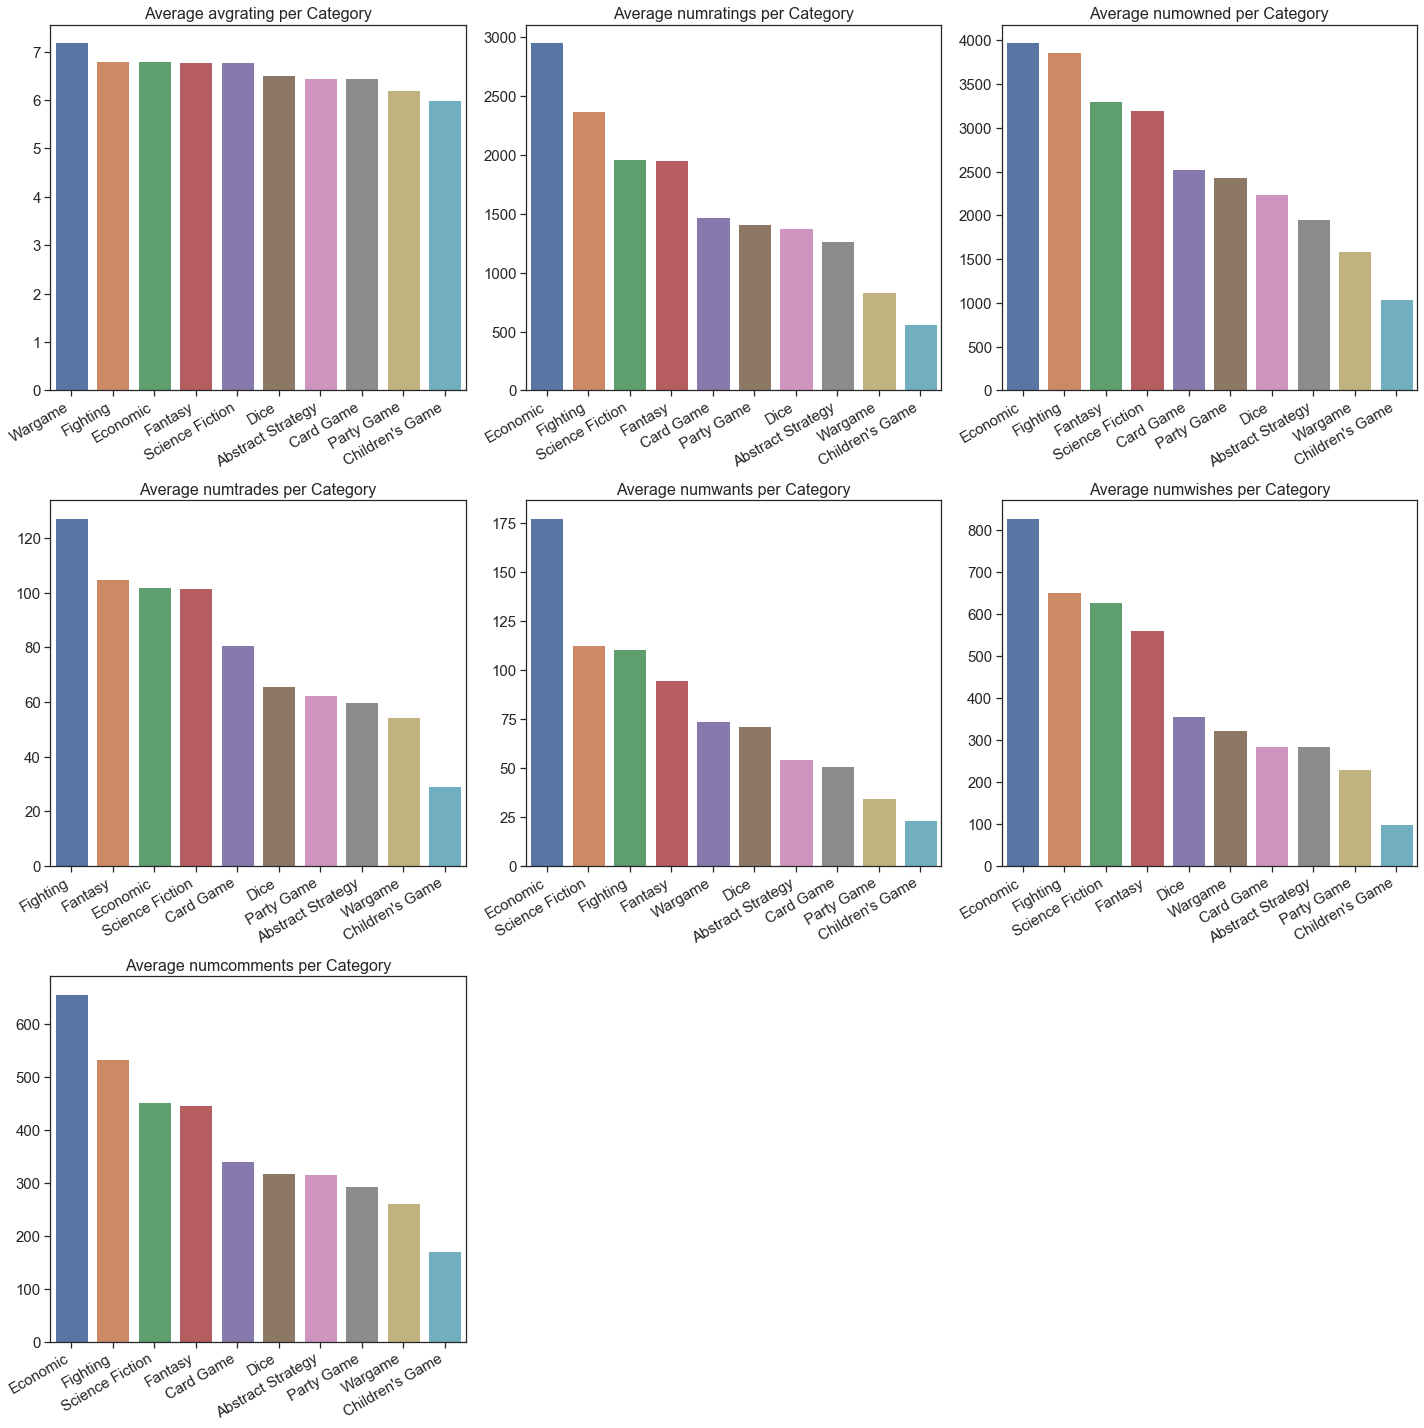

In [14]:
splits, overallstats = summarize_per_attribute(games_category, 100, 1990, 2019, categories, popularity_metrics)
fig = plt.figure(figsize=(20,20))
for i, metric in enumerate(popularity_metrics):
    plt.subplot(3,3,i+1)
    plot_avg_stats(overallstats, metric, "Category")
plt.tight_layout()

### 2. Average popularity metrics per mechanics

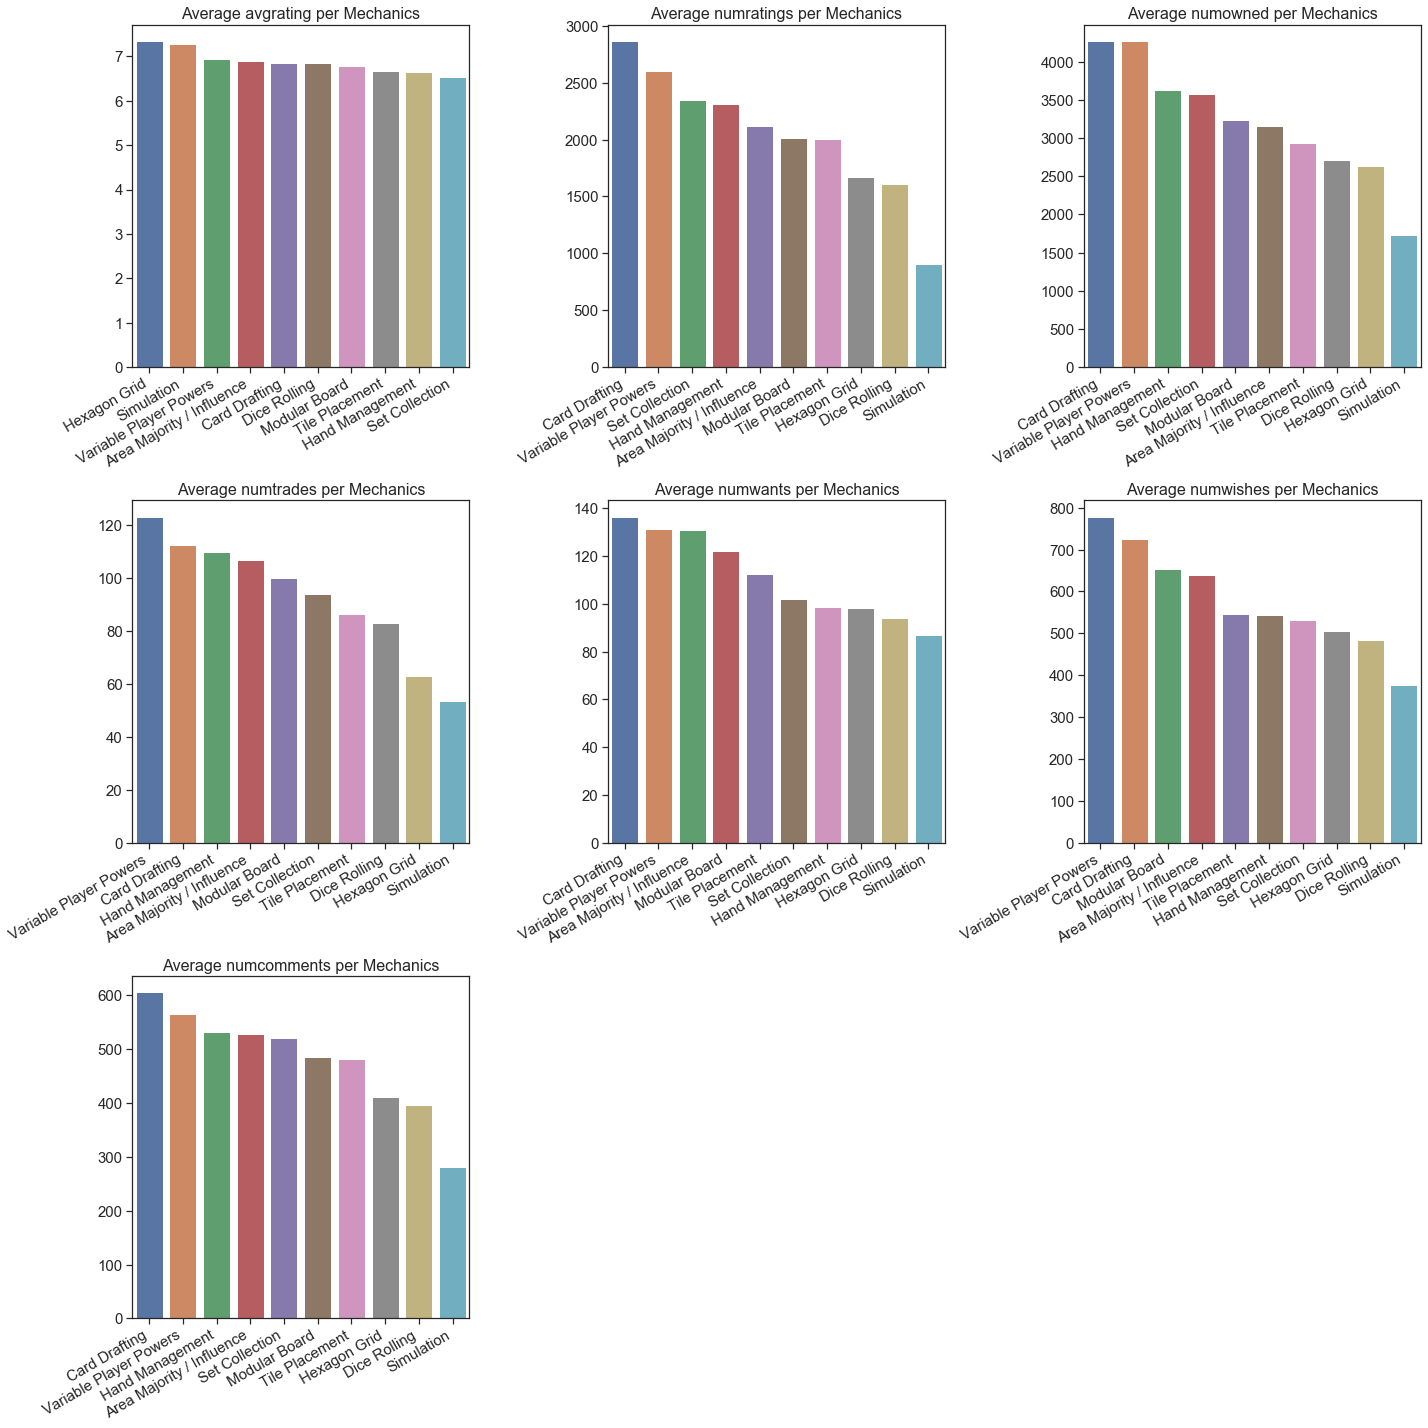

In [15]:
splits, overallstats = summarize_per_attribute(games_mechanic, 100, 1990, 2019, mechanics, popularity_metrics)
fig = plt.figure(figsize=(20,20))
for i, metric in enumerate(popularity_metrics):
    plt.subplot(3,3,i+1)
    plot_avg_stats(overallstats, metric, "Mechanics")
plt.tight_layout()

### 3. Average popularity metrics per designer

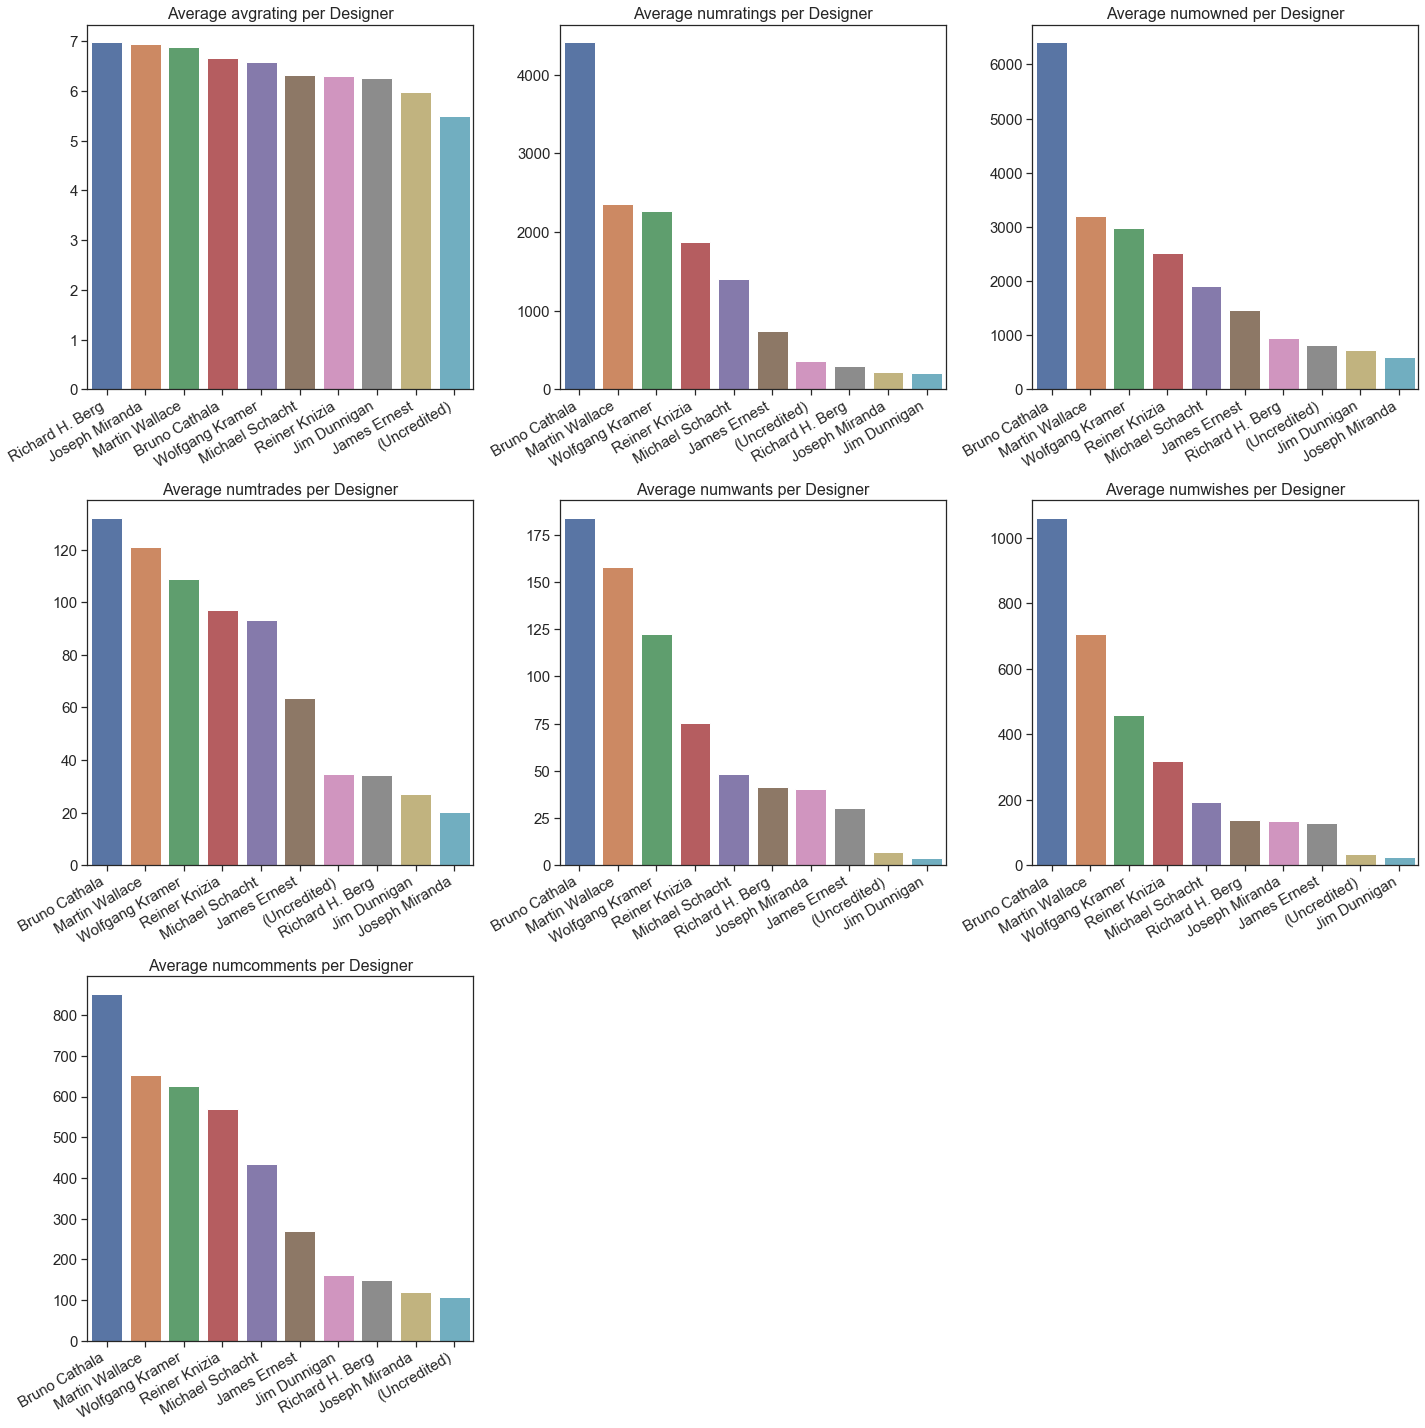

In [17]:
splits, overallstats = summarize_per_attribute(games_designer, 100, 1990, 2019, designers, popularity_metrics)
fig = plt.figure(figsize=(20,20))
for i, metric in enumerate(popularity_metrics):
    plt.subplot(3,3,i+1)
    plot_avg_stats(overallstats, metric, "Designer")
plt.tight_layout()